In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
edx_courses = pd.read_csv('Moocs/edx_courses.csv')

In [66]:
edx_courses.columns

Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subject', 'language', 'subtitles',
       'course_effort', 'course_length', 'price', 'course_description',
       'course_syllabus', 'course_url'],
      dtype='object')

- La meta general siempre suele ser ganar mas, sin embargo el dataset no provee la cantidad de suscriptores que pagaron certificacion, entonces la meta sera ganar el mayor numero de suscriptores, considerados como posibles compradores.
- Tambien hay que agregar que no hay fechas de publicacion en los cursos, entonces no voy a analizar como tal, la cantidad de suscriptores por año y demas, en otras palabras, es poco probable que utilice graficos de lineas de tiempo en mi analisis.

In [67]:
edx_courses.isnull().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

In [68]:
edx_courses[edx_courses['n_enrolled'].isnull()]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
13,English Grammar and Style,Learn key concepts and strategies in grammar a...,NaN,Instructor-led on a course schedule,The University of Queensland,Roslyn Petelin,Introductory,Humanities,English,English,3–4 hours per week,8 Weeks,FREE-Add a Verified Certificate for $99 USD,With the rise of social media and the Internet...,"In Week 1 , we'll introduce you to the course ...",https://www.edx.org/course/english-grammar-and...
459,Business Communication,Learn how to effectively communicate and build...,NaN,Self-paced on your time,Rochester Institute of Technology,Andrea Hickerson-Keri Barone,Introductory,Communication,English,English,4–6 hours per week,3 Weeks,FREE-Add a Verified Certificate for $199 USD,Business communication is vital to professiona...,NaN,https://www.edx.org/course/business-communicat...
462,Agua 2.0: empresas eficientes para el siglo XXI,El curso te presenta una visión integral de la...,NaN,Self-paced on your time,Inter-American Development Bank,Sergio Campos-Corinne Cathala-Federico Pérez,Introductory,Business & Management,Español,Español,2–3 hours per week,8 Weeks,FREE-Add a Verified Certificate for $25 USD,¿Eres un profesional o actor activo del sector...,Módulo 1 - Las empresas de agua y saneamiento ...,https://www.edx.org/course/agua-20-empresas-ef...
494,Introduction to Cloud Computing,"Master the core concepts in Cloud Computing, f...",NaN,Self-paced on your time,IBM,Rav Ahuja,Introductory,Computer Science,English,English,1–2 hours per week,6 Weeks,FREE-Add a Verified Certificate for $49 USD,This course introduces you to the core concept...,Module 1: Overview of Cloud ComputingModule 2:...,https://www.edx.org/course/introduction-to-clo...
502,SQL aplicado en la ciencia de datos,Aprende a usar y aplicar el poderoso lenguaje ...,NaN,Self-paced on your time,IBM,Rav Ahuja,Introductory,Data Analysis & Statistics,Español,Español,2–4 hours per week,4 Weeks,FREE-Add a Verified Certificate for $39 USD,Gran parte de los datos del mundo viven en bas...,NaN,https://www.edx.org/course/sql-aplicado-en-la-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,Drones and Autonomous Systems 2: Applications ...,Learn the latest applications of unmanned aeri...,NaN,Self-paced on your time,University of Maryland Global Campus-Universit...,"Brian Powers, M.A.",Intermediate,Science,English,English,2–3 hours per week,6 Weeks,FREE-Add a Verified Certificate for $149 USD,If you want to be the technology specialist wh...,"Week 1: Introduction to hazards, disasters and...",https://www.edx.org/course/drones-and-autonomo...
968,MathTrackX: Differential Calculus,Discover concepts and techniques relating to d...,NaN,Self-paced on your time,University of Adelaide,Dr Melissa Humphries-Dr Danny Stevenson-Dr Dav...,Introductory,Math,English,English,3–6 hours per week,4 Weeks,FREE-Add a Verified Certificate for $79 USD,This course is part three of the MathTrackX XS...,NaN,https://www.edx.org/course/mathtrackx-differen...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...


In [69]:
edx_courses[edx_courses['instructors'].isnull()]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
390,Analytics in Python,Learn the fundamental of programming in Python...,"82,210",Instructor-led on a course schedule,Columbia University,NaN,Intermediate,Business & Management,English,NaN,8–10 hours per week,12 Weeks,FREE-Add a Verified Certificate for $249 USD,Data is the lifeblood of an organization. Comp...,NaN,https://www.edx.org/course/analytics-in-python
401,Just Reading and Writing in English | 生活英语读写,Learn how to read and write in English in the ...,"33,303",Self-paced on your time,Tsinghua University,NaN,Introductory,Art & Culture,English,English,2–4 hours per week,15 Weeks,FREE-Add a Verified Certificate for $149 USD,Reading enriches our life and writing enables ...,Week 1 - Learning\nIntroduction to the problem...,https://www.edx.org/course/just-reading-and-wr...
516,"Data, Models and Decisions in Business Analytics",Learn fundamental tools and techniques for usi...,"36,289",Instructor-led on a course schedule,Columbia University,NaN,Advanced,Business & Management,English,NaN,8–10 hours per week,12 Weeks,FREE-Add a Verified Certificate for $249 USD,"In today’s world, managerial decisions are inc...",NaN,https://www.edx.org/course/data-models-and-dec...


In [70]:
edx_courses[edx_courses['subtitles'].isnull()]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
390,Analytics in Python,Learn the fundamental of programming in Python...,"82,210",Instructor-led on a course schedule,Columbia University,NaN,Intermediate,Business & Management,English,NaN,8–10 hours per week,12 Weeks,FREE-Add a Verified Certificate for $249 USD,Data is the lifeblood of an organization. Comp...,NaN,https://www.edx.org/course/analytics-in-python
516,"Data, Models and Decisions in Business Analytics",Learn fundamental tools and techniques for usi...,"36,289",Instructor-led on a course schedule,Columbia University,NaN,Advanced,Business & Management,English,NaN,8–10 hours per week,12 Weeks,FREE-Add a Verified Certificate for $249 USD,"In today’s world, managerial decisions are inc...",NaN,https://www.edx.org/course/data-models-and-dec...
640,Ecodesign for Cities and Suburbs,NaN,"28,472",Self-paced on your time,University of British Columbia,Jonathan Barnett-Larry Beasley,Introductory,Environmental Studies,English,NaN,4–5 hours per week,6 Weeks,FREE-Add a Verified Certificate for $99 USD,Too often modern cities and suburbs are disorg...,Week 1: How the usual urban growth model opera...,https://www.edx.org/course/ecodesign-for-citie...


In [71]:
edx_courses.columns

Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subject', 'language', 'subtitles',
       'course_effort', 'course_length', 'price', 'course_description',
       'course_syllabus', 'course_url'],
      dtype='object')

In [72]:
edx_courses['n_enrolled']

0        124,980
1        293,864
2      2,442,271
3        129,555
4         81,140
         ...    
970          NaN
971          NaN
972       11,246
973        8,775
974          NaN
Name: n_enrolled, Length: 975, dtype: object

In [73]:
edx_courses['n_enrolled'] = edx_courses['n_enrolled'].str.replace(',', '')  # Eliminar comas
edx_courses['n_enrolled'] = edx_courses['n_enrolled'].fillna('0')  # Reemplazar NaN por '0'
edx_courses['n_enrolled'] = edx_courses['n_enrolled'].astype(int)  # Convertir a entero

In [74]:
edx_courses['n_enrolled']

0       124980
1       293864
2      2442271
3       129555
4        81140
        ...   
970          0
971          0
972      11246
973       8775
974          0
Name: n_enrolled, Length: 975, dtype: int32

In [75]:
edx_courses.columns

Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subject', 'language', 'subtitles',
       'course_effort', 'course_length', 'price', 'course_description',
       'course_syllabus', 'course_url'],
      dtype='object')

In [76]:
edx_courses['course_type'].unique()

array(['Self-paced on your time', 'Instructor-led on a course schedule'],
      dtype=object)

In [77]:
len(edx_courses['institution'].unique())

111

In [78]:
len(edx_courses['instructors'].unique())

776

In [79]:
edx_courses['Level'].unique()

array(['Introductory', 'Intermediate', 'Advanced'], dtype=object)

In [80]:
edx_courses['subject'].unique()

array(['Education & Teacher Training', 'Computer Science',
       'Data Analysis & Statistics', 'Business & Management',
       'Communication', 'Health & Safety', 'Math', 'Humanities', 'Ethics',
       'Economics & Finance', 'Food & Nutrition',
       'Biology & Life Sciences', 'Social Sciences', 'Architecture',
       'Medicine', 'Environmental Studies', 'Chemistry', 'Art & Culture',
       'Language', 'Engineering', 'Philosophy & Ethics', 'Electronics',
       'History', 'Literature', 'Physics', 'Law', 'Design', 'Science',
       'Music', 'Energy & Earth Sciences', 'Philanthropy'], dtype=object)

In [81]:
edx_courses['language'].unique()

array(['English', 'Español', 'Italiano', '日本語', 'Français', '中文',
       'Português', 'اللغة العربية', 'Deutsch'], dtype=object)

In [82]:
edx_courses['subtitles'].unique()

array(['English', 'English, Español, Русский', 'English, 中文, 中文',
       'Deutsch, English, Español, Português, 中文', 'English, Español',
       'Español', 'Italiano', 'English, 日本語', 'English, हिन्दी',
       'English, Português', 'English, 中文', 'English, Français',
       'اللغة العربية, English, עברית',
       'English, Español, Français, עברית, Indonesian, Italiano, 日本語, Português, Türkçe',
       'English, Español, Português, 中文', 'English, 日本語, 한국어, 中文',
       'Français', 'اللغة العربية, English, Español, हिन्दी, Português',
       'Español, Español', 'English, Español, Français, 中文', nan,
       '日本語, 中文', 'Português', 'English, Español, Português',
       'English, Русский',
       'اللغة العربية, English, Español, Français, Русский, 中文',
       'English, Français, 中文, 中文', 'Deutsch, English, Español, Français',
       'اللغة العربية', 'Deutsch',
       'اللغة العربية, English, Español, Français, Русский',
       'English, English, 中文, 中文', 'English, Português, Русский',
      

In [83]:
pip install fuzzywuzzy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [84]:
from fuzzywuzzy import fuzz

# Lista de valores únicos para asignar
categories = ['English', 'Español', 'Italiano', '日本語', 'Français', '中文', 'Português', 'اللغة العربية', 'Deutsch']

# Definir una función para obtener la categoría con mayor similitud
def get_most_similar_category(subtitle, categories):
    similarity_scores = [fuzz.ratio(subtitle, category) for category in categories]
    max_index = similarity_scores.index(max(similarity_scores))
    return categories[max_index]

# Iterar en las filas del DataFrame y asignar la categoría de mayor similitud
for index, row in edx_courses.iterrows():
    subtitle = row['subtitles']
    if isinstance(subtitle, str):  # Verificar que el valor no sea NaN
        edx_courses.at[index, 'subtitles'] = get_most_similar_category(subtitle, categories)

In [85]:
edx_courses['subtitles'].unique()

array(['English', 'Português', 'Español', 'Italiano', 'Français',
       'اللغة العربية', nan, '日本語', 'Deutsch'], dtype=object)

In [86]:
edx_courses.columns

Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subject', 'language', 'subtitles',
       'course_effort', 'course_length', 'price', 'course_description',
       'course_syllabus', 'course_url'],
      dtype='object')

In [87]:
edx_courses['course_effort'].unique()

array(['2–3 hours per week', '2–4 hours per week', '6–18 hours per week',
       '10–15 hours per week', '5–7 hours per week',
       '8–10 hours per week', '1–3 hours per week', '3–4 hours per week',
       '3–5 hours per week', '2–6 hours per week', '1–2 hours per week',
       '2–5 hours per week', '4–6 hours per week', '10–30 hours per week',
       '6–9 hours per week', '3–6 hours per week', '5–10 hours per week',
       '4–5 hours per week', '5–8 hours per week', '5–6 hours per week',
       '9–10 hours per week', '4–8 hours per week',
       '15–20 hours per week', '6–8 hours per week',
       '10–14 hours per week', '10–20 hours per week',
       '8–12 hours per week', '4–10 hours per week',
       '10–12 hours per week', '7–10 hours per week',
       '3–7 hours per week', '1–4 hours per week', '6–10 hours per week',
       '1–5 hours per week', '8–9 hours per week', '6–12 hours per week',
       '3–8 hours per week', '1–10 hours per week',
       '10–18 hours per week', '4–12 

In [88]:
edx_courses['course_length']

0       2 Weeks
1       7 Weeks
2      12 Weeks
3      13 Weeks
4       4 Weeks
         ...   
970    10 Weeks
971    12 Weeks
972     6 Weeks
973     1 Weeks
974     4 Weeks
Name: course_length, Length: 975, dtype: object

In [89]:
import re

# Extraer solo el número de semanas
edx_courses['course_length'] = edx_courses['course_length'].str.extract(r'(\d+) Weeks', expand=False)

# Convertir a tipo de datos entero
edx_courses['course_length'] = edx_courses['course_length'].astype(int)

In [90]:
edx_courses['course_length'].unique()

array([ 2,  7, 12, 13,  4,  6, 10,  8,  5, 16, 15,  1, 11, 14,  9,  3, 18,
       17])

In [91]:
len(edx_courses['price'].unique())

47

In [92]:
edx_courses['price'].unique()

array(['FREE-Add a Verified Certificate for $49 USD',
       'FREE-Add a Verified Certificate for $90 USD',
       'FREE-Add a Verified Certificate for $199 USD',
       'FREE-Add a Verified Certificate for $249 USD',
       'FREE-Add a Verified Certificate for $5 USD',
       'FREE-Add a Verified Certificate for $99 USD',
       'FREE-Add a Verified Certificate for $39 USD',
       'FREE-Add a Verified Certificate for $399 USD',
       'FREE-Add a Verified Certificate for $149 USD',
       'FREE-Add a Verified Certificate for $125 USD',
       'FREE-Add a Verified Certificate for $40 USD',
       'FREE-Add a Verified Certificate for $25 USD',
       'FREE-Add a Verified Certificate for $50 USD',
       'FREE-Add a Verified Certificate for $169 USD',
       'FREE-Add a Verified Certificate for $70 USD',
       'FREE-Add a Verified Certificate for $79 USD',
       'FREE-Add a Verified Certificate for $150 USD',
       'FREE-Add a Verified Certificate for $69 USD',
       'FREE-Add a Ver

In [93]:
import re

# Extraer solo el número de precio
edx_courses['price'] = edx_courses['price'].str.extract(r'\$(\d+)', expand=False)

# Convertir a tipo de datos entero
edx_courses['price'] = edx_courses['price'].astype(int)

In [94]:
edx_courses['price'].unique()

array([ 49,  90, 199, 249,   5,  99,  39, 399, 149, 125,  40,  25,  50,
       169,  70,  79, 150,  69, 200, 225,  75, 300, 139, 350,  19, 100,
       450, 119,  60, 299,  29,  65,  15, 214,  10, 129,  59, 179, 250,
       159, 375, 166,  30])

In [95]:
len(edx_courses['price'].unique())

43

In [96]:
edx_courses.columns

Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subject', 'language', 'subtitles',
       'course_effort', 'course_length', 'price', 'course_description',
       'course_syllabus', 'course_url'],
      dtype='object')

Cantidad de cursos por tipo de curso

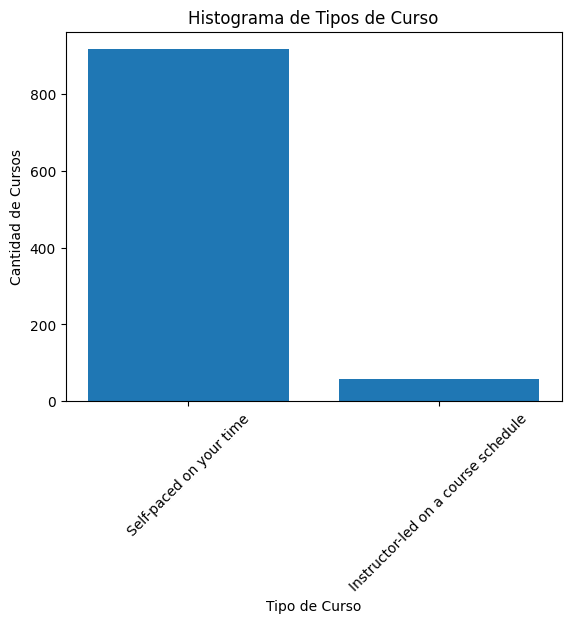

In [97]:
import matplotlib.pyplot as plt

# Obtener los valores únicos y sus frecuencias
course_type_counts = edx_courses['course_type'].value_counts()

# Crear el gráfico de histograma
plt.bar(course_type_counts.index, course_type_counts.values)
plt.xlabel('Tipo de Curso')
plt.ylabel('Cantidad de Cursos')
plt.title('Histograma de Tipos de Curso')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

- Hay muchos mas cursos offtime, 'A su propio ritmo en su tiempo'

Cantidad de suscriptores por tipo de curso

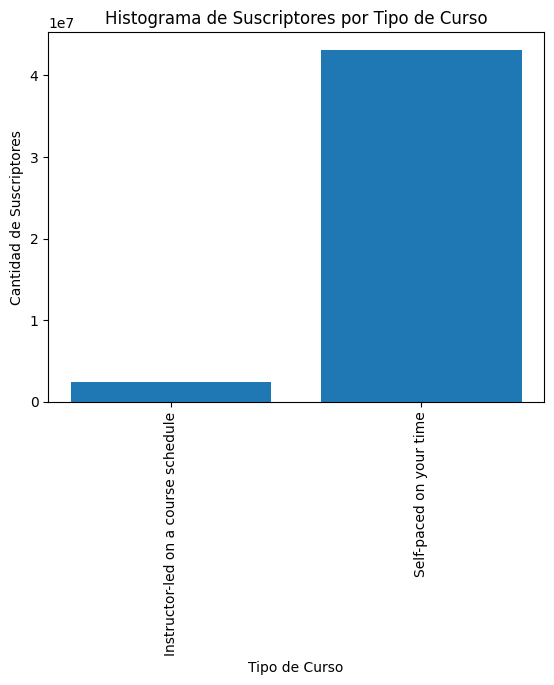

In [98]:
import matplotlib.pyplot as plt

# Agrupar por tipo de curso y calcular la suma de suscriptores
course_type_subscribers = edx_courses.groupby('course_type')['n_enrolled'].sum()

# Crear el gráfico de histograma
plt.bar(course_type_subscribers.index, course_type_subscribers.values)
plt.xlabel('Tipo de Curso')
plt.ylabel('Cantidad de Suscriptores')
plt.title('Histograma de Suscriptores por Tipo de Curso')

# Ajustar el espaciado entre las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

- Como era de esperar, hay muchos mas suscriptores de los cursos 'A su propio ritmo en su tiempo' que los que son 'Dirigido por un instructor en un horario de curso'

In [99]:
edx_courses.columns

Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subject', 'language', 'subtitles',
       'course_effort', 'course_length', 'price', 'course_description',
       'course_syllabus', 'course_url'],
      dtype='object')

Cantidad de cursos por institucion

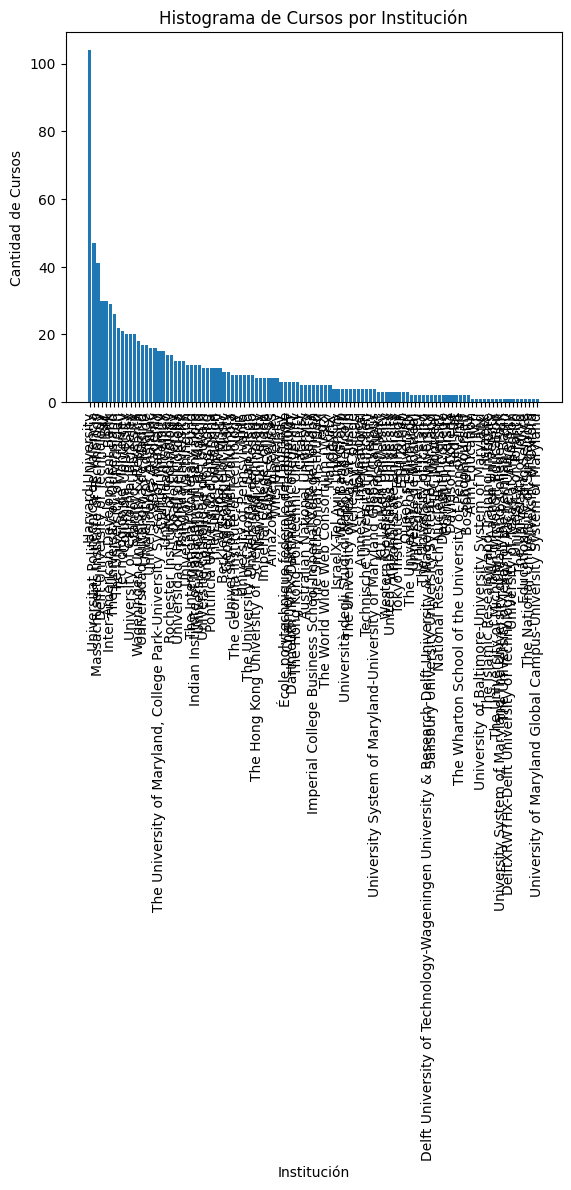

In [100]:
import matplotlib.pyplot as plt

# Contar la cantidad de cursos por institución
institution_course_counts = edx_courses['institution'].value_counts()

# Crear el gráfico de barras
plt.bar(institution_course_counts.index, institution_course_counts.values)
plt.xlabel('Institución')
plt.ylabel('Cantidad de Cursos')
plt.title('Histograma de Cursos por Institución')

# Ajustar el espaciado entre las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

Cantidad de suscriptores por institucion

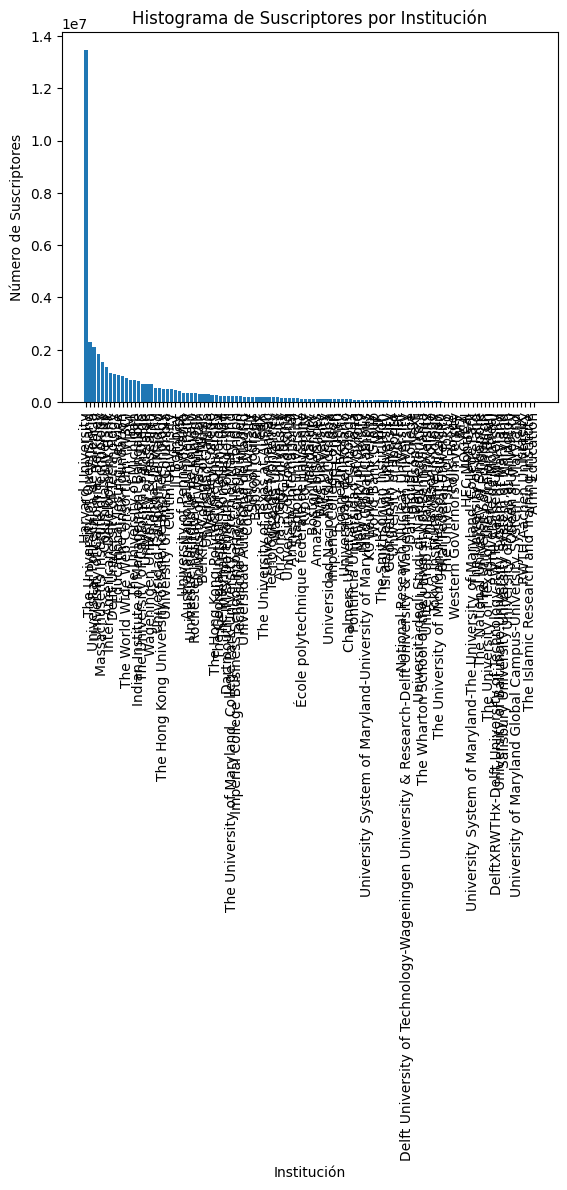

In [101]:
import matplotlib.pyplot as plt

# Agrupar por institución y calcular la suma de suscriptores
institution_subscribers = edx_courses.groupby('institution')['n_enrolled'].sum()

# Ordenar en orden descendente
institution_subscribers = institution_subscribers.sort_values(ascending=False)

# Crear el gráfico de barras en orden descendente
plt.bar(institution_subscribers.index, institution_subscribers.values)
plt.xlabel('Institución')
plt.ylabel('Número de Suscriptores')
plt.title('Histograma de Suscriptores por Institución')

# Ajustar el espaciado entre las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

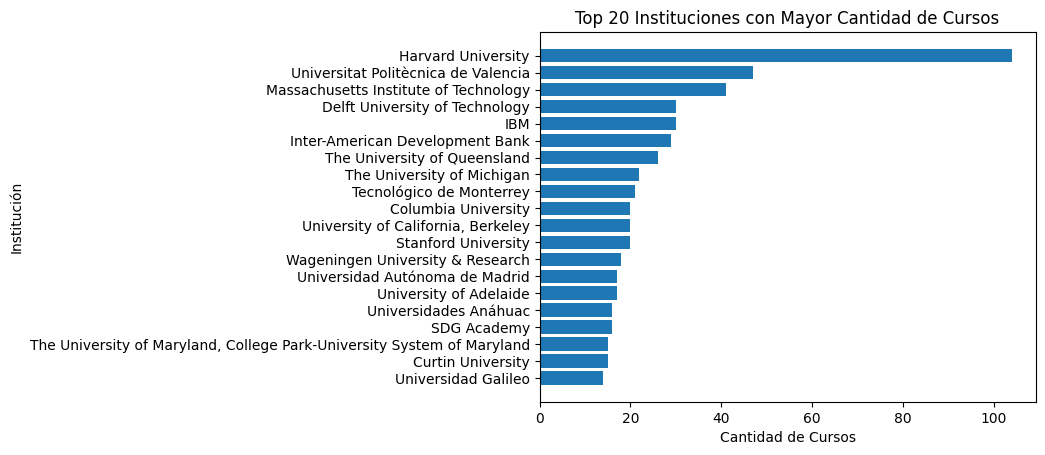

In [102]:
import matplotlib.pyplot as plt

# Contar la cantidad de cursos por institución
institution_course_counts = edx_courses['institution'].value_counts()

# Obtener el top 20 de instituciones con mayor cantidad de cursos en orden descendente
top_20_institutions_courses = institution_course_counts.head(20)[::-1]

# Crear el gráfico de barras horizontales
plt.barh(top_20_institutions_courses.index, top_20_institutions_courses.values)
plt.xlabel('Cantidad de Cursos')
plt.ylabel('Institución')
plt.title('Top 20 Instituciones con Mayor Cantidad de Cursos')

# Mostrar el gráfico
plt.show()

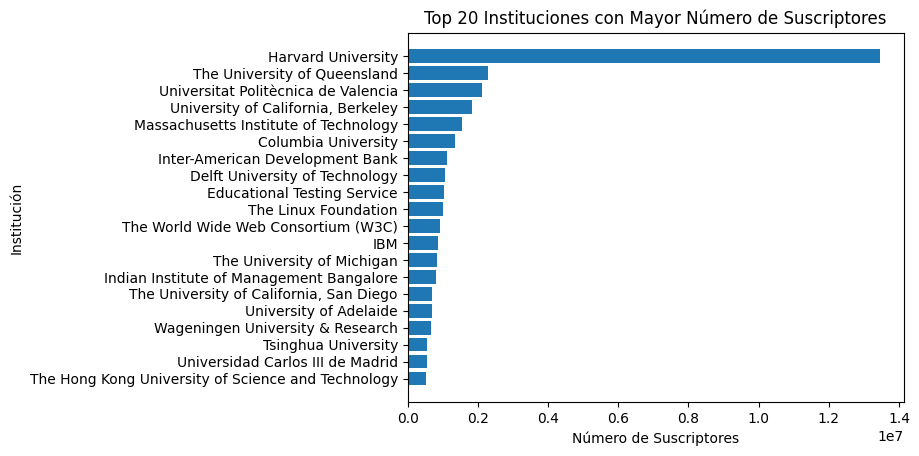

In [103]:
import matplotlib.pyplot as plt

# Agrupar por institución y calcular la suma de suscriptores
institution_subscribers = edx_courses.groupby('institution')['n_enrolled'].sum()

# Obtener el top 20 de instituciones con mayor número de suscriptores en orden descendente
top_20_institutions_subscribers = institution_subscribers.nlargest(20)[::-1]

# Crear el gráfico de barras horizontales
plt.barh(top_20_institutions_subscribers.index, top_20_institutions_subscribers.values)
plt.xlabel('Número de Suscriptores')
plt.ylabel('Institución')
plt.title('Top 20 Instituciones con Mayor Número de Suscriptores')

# Mostrar el gráfico
plt.show()

- Bueno, indiscutiblemente Harvard es el mas chingon de entre todos.
- Digamos que el prestigio, la fama y la calidad de los cursos de Harvard son variables que posibilitan esta diferencia significativa respecto del resto. Por tanto podriamos suponer que es buena idea agregar cursos de universidades prestigiosas con excelente contenido educativo a nuestra plataforma.

In [104]:
edx_courses.columns

Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subject', 'language', 'subtitles',
       'course_effort', 'course_length', 'price', 'course_description',
       'course_syllabus', 'course_url'],
      dtype='object')

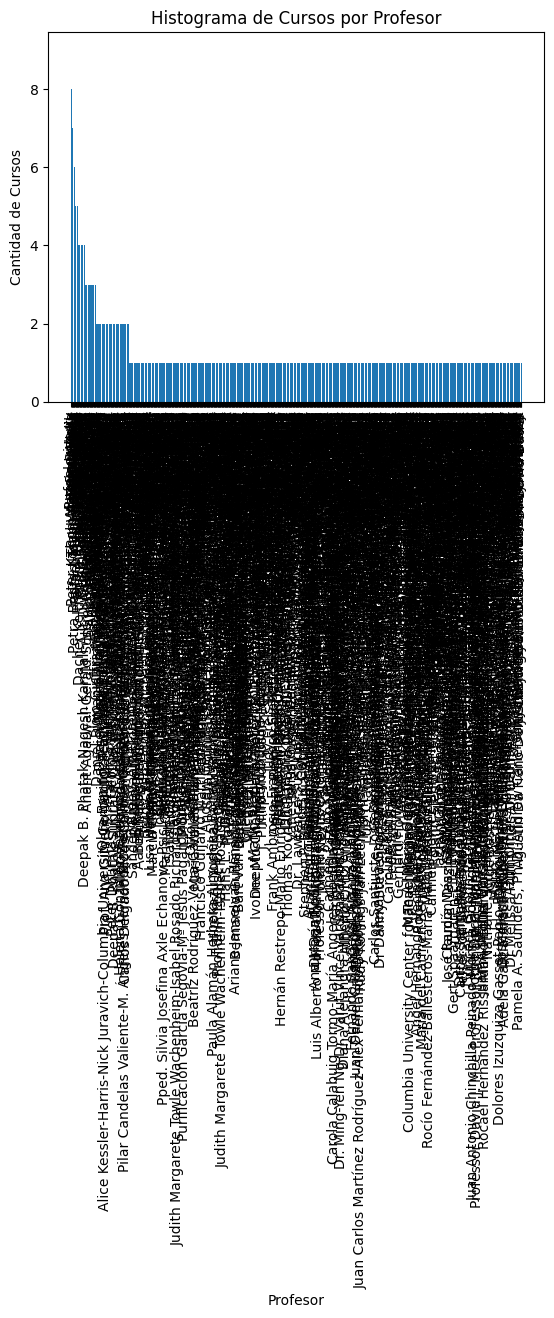

In [105]:
import matplotlib.pyplot as plt

# Agrupar por profesor y contar la cantidad de cursos
professor_courses = edx_courses['instructors'].value_counts()

# Ordenar en forma descendente
professor_courses = professor_courses.sort_values(ascending=False)

# Crear el gráfico de barras
plt.bar(professor_courses.index, professor_courses.values)
plt.xlabel('Profesor')
plt.ylabel('Cantidad de Cursos')
plt.title('Histograma de Cursos por Profesor')

# Ajustar el espaciado entre las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

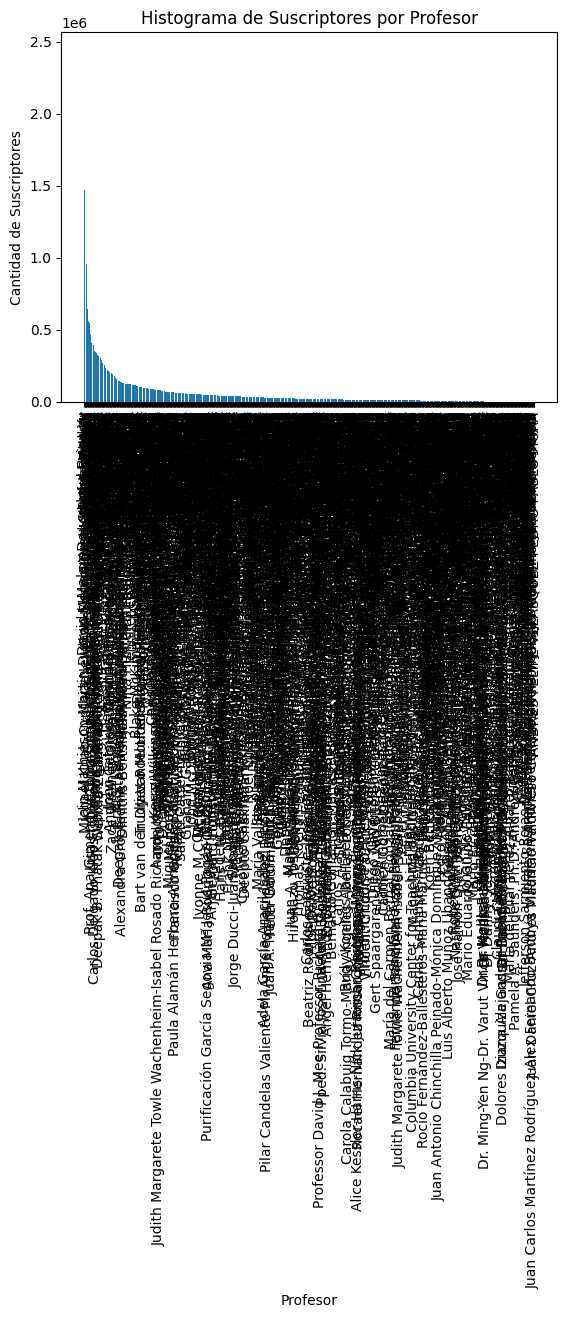

In [106]:
import matplotlib.pyplot as plt

# Agrupar por profesor y calcular la suma de suscriptores
professor_subscribers = edx_courses.groupby('instructors')['n_enrolled'].sum()

# Ordenar en forma descendente
professor_subscribers = professor_subscribers.sort_values(ascending=False)

# Crear el gráfico de barras
plt.bar(professor_subscribers.index, professor_subscribers.values)
plt.xlabel('Profesor')
plt.ylabel('Cantidad de Suscriptores')
plt.title('Histograma de Suscriptores por Profesor')

# Ajustar el espaciado entre las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

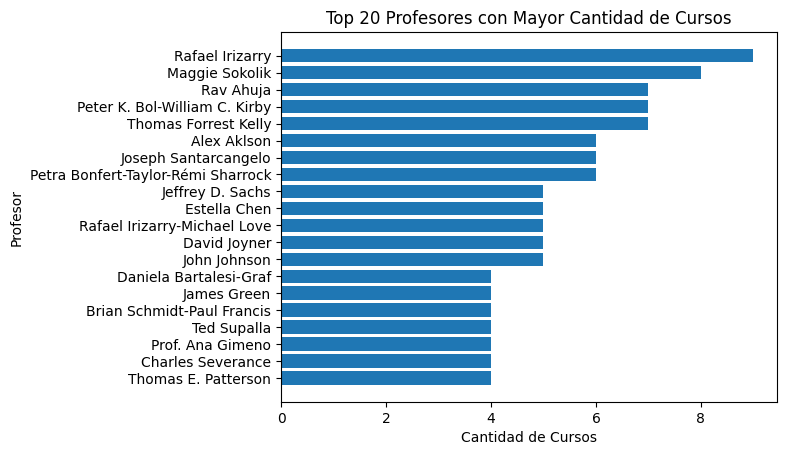

In [107]:
import matplotlib.pyplot as plt

# Agrupar por profesor y contar la cantidad de cursos
professor_courses = edx_courses['instructors'].value_counts()

# Obtener el top 20 de profesores con mayor cantidad de cursos en orden descendente
top_20_professors_courses = professor_courses.head(20)[::-1]

# Crear el gráfico de barras horizontales
plt.barh(top_20_professors_courses.index, top_20_professors_courses.values)
plt.xlabel('Cantidad de Cursos')
plt.ylabel('Profesor')
plt.title('Top 20 Profesores con Mayor Cantidad de Cursos')

# Mostrar el gráfico
plt.show()

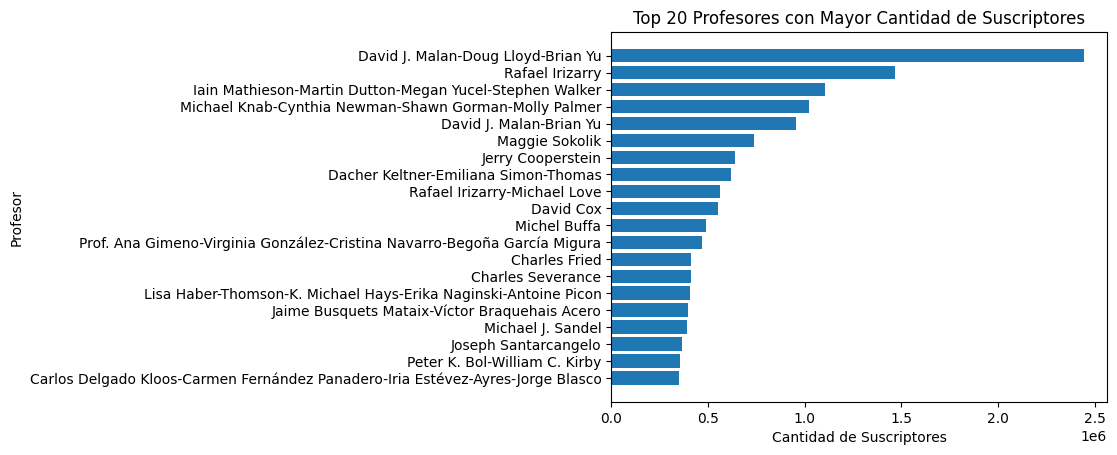

In [108]:
import matplotlib.pyplot as plt

# Agrupar por profesor y calcular la suma de suscriptores
professor_subscribers = edx_courses.groupby('instructors')['n_enrolled'].sum()

# Obtener el top 20 de profesores con mayor cantidad de suscriptores en orden descendente
top_20_professors_subscribers = professor_subscribers.sort_values(ascending=False).head(20)

# Crear el gráfico de barras horizontales en forma descendente
plt.barh(top_20_professors_subscribers.index[::-1], top_20_professors_subscribers.values[::-1])
plt.xlabel('Cantidad de Suscriptores')
plt.ylabel('Profesor')
plt.title('Top 20 Profesores con Mayor Cantidad de Suscriptores')

# Mostrar el gráfico
plt.show()

- Podriamos decir que a una parte importante de la comunidad le gusta el contenido de David (David el mas verga).

In [109]:
edx_courses.columns

Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subject', 'language', 'subtitles',
       'course_effort', 'course_length', 'price', 'course_description',
       'course_syllabus', 'course_url'],
      dtype='object')

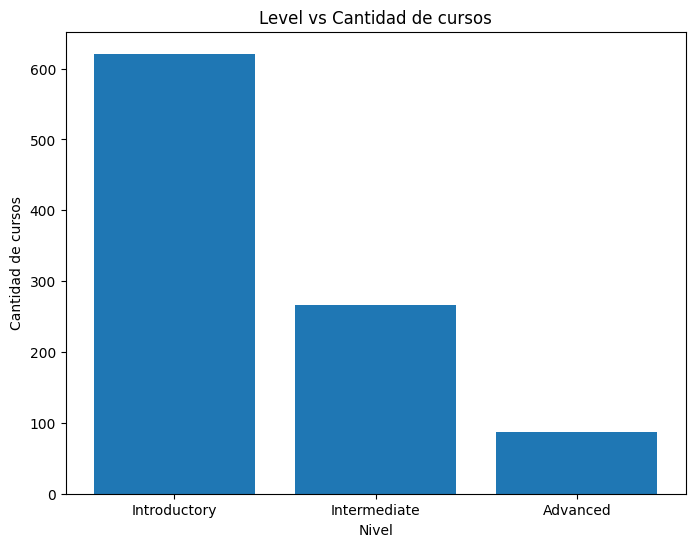

In [110]:
# Obtener los valores únicos y el recuento de cada nivel
nivel_cursos = edx_courses['Level'].value_counts()

# Histograma de level vs cantidad de cursos
plt.figure(figsize=(8, 6))
plt.bar(nivel_cursos.index, nivel_cursos.values)
plt.xlabel('Nivel')
plt.ylabel('Cantidad de cursos')
plt.title('Level vs Cantidad de cursos')
plt.show()

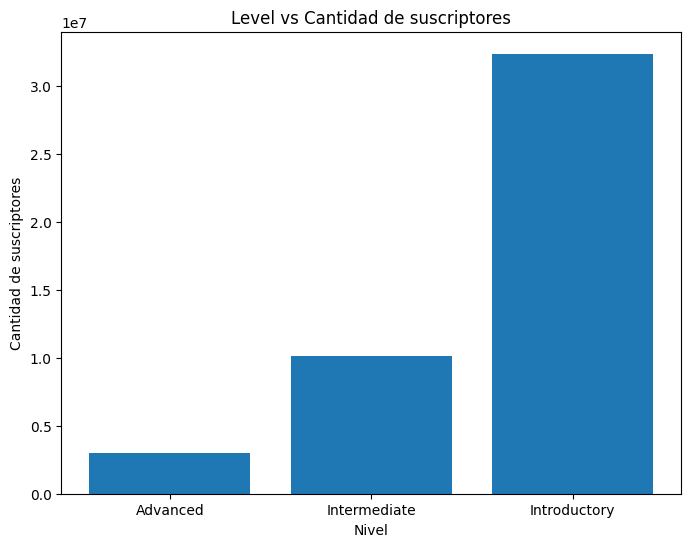

In [111]:
# Obtener los suscriptores por nivel
suscriptores_nivel = edx_courses.groupby('Level')['n_enrolled'].sum()

# Histograma de level vs cantidad de suscriptores
plt.figure(figsize=(8, 6))
plt.bar(suscriptores_nivel.index, suscriptores_nivel.values)
plt.xlabel('Nivel')
plt.ylabel('Cantidad de suscriptores')
plt.title('Level vs Cantidad de suscriptores')
plt.show()

- Los cursos de nivel Introductorio son los que atraen a mas suscriptores
- Podriamos tambien apostar a cursos de niveles mas avanzados pero explicados de una forma mas amena, en este caso habria que invertir en buenos profesores, pero depende sobre todo al publico en el que se este dirigiendo el negocio.

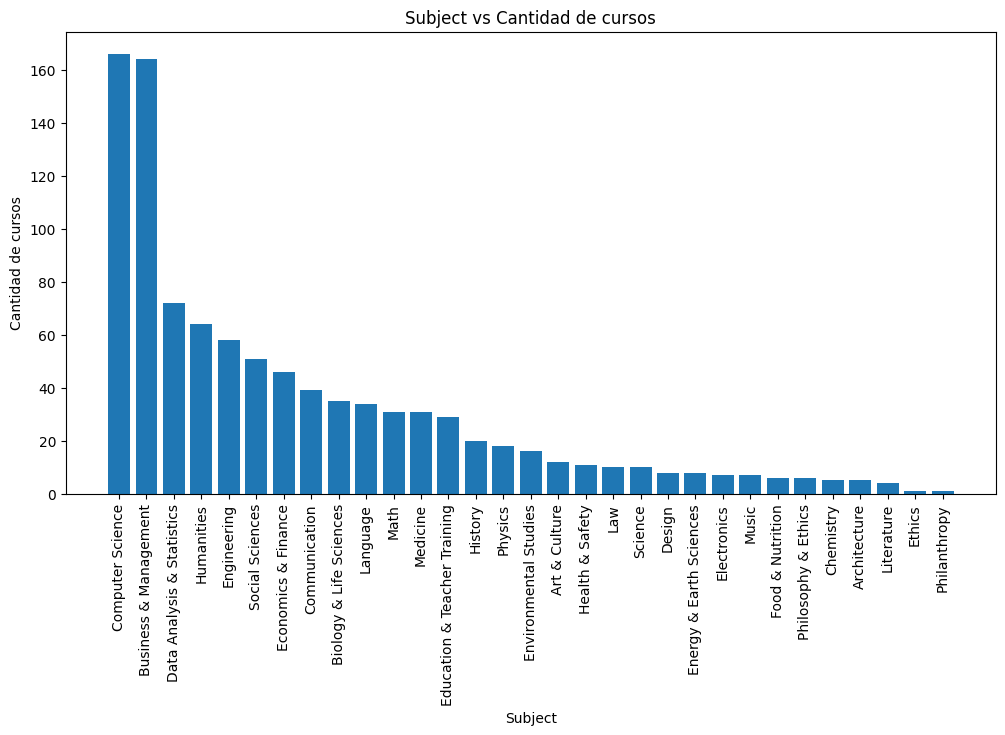

In [112]:
# Obtener los valores únicos y el recuento de cursos por subject
cursos_por_subject = edx_courses['subject'].value_counts()

# Histograma de Subject vs cantidad de cursos
plt.figure(figsize=(12, 6))
plt.bar(cursos_por_subject.index, cursos_por_subject.values)
plt.xlabel('Subject')
plt.ylabel('Cantidad de cursos')
plt.title('Subject vs Cantidad de cursos')
plt.xticks(rotation=90)
plt.show()

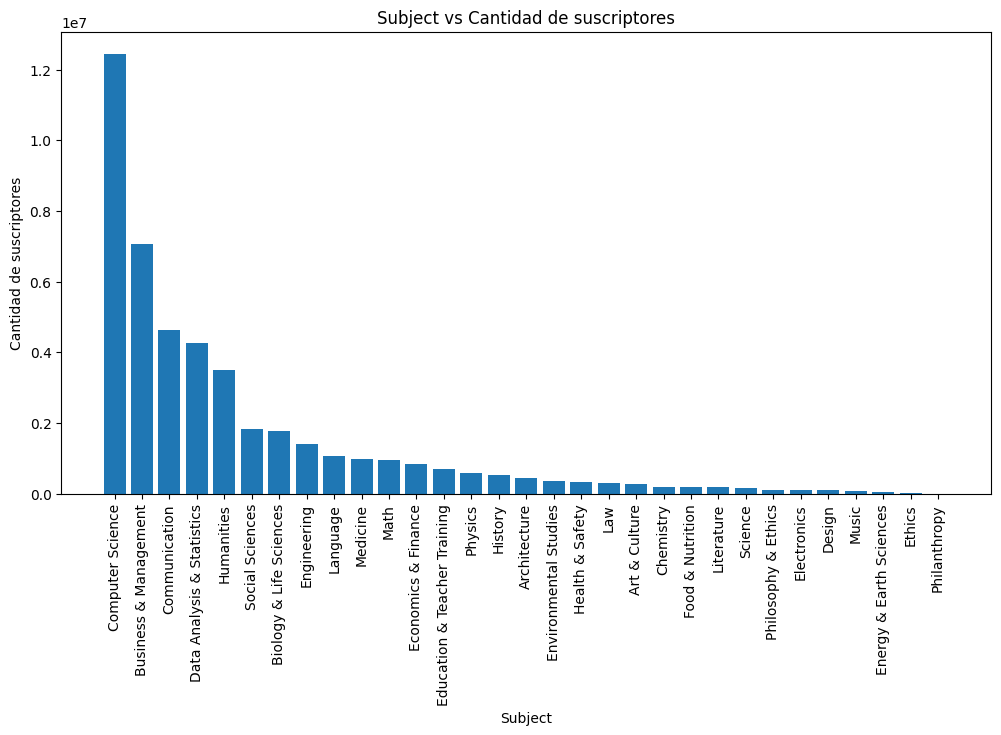

In [113]:
# Obtener la suma de suscriptores por subject
suscriptores_por_subject = edx_courses.groupby('subject')['n_enrolled'].sum().sort_values(ascending=False)

# Histograma de Subject vs cantidad de suscriptores
plt.figure(figsize=(12, 6))
plt.bar(suscriptores_por_subject.index, suscriptores_por_subject.values)
plt.xlabel('Subject')
plt.ylabel('Cantidad de suscriptores')
plt.title('Subject vs Cantidad de suscriptores')
plt.xticks(rotation=90)
plt.show()

- Bueno, como era de esperar, la moda ahora es el area de ciencias de la computacion + Administracion de empresas. En realidad para la empresa que quiera comenzar en este rubro les convendria hacer cursos de por lo menos los top 5 de este histograma.
- Tambien hay que decir que quizas podriamos realizar estudios sobre tendencias de las proximas areas de moda, y en este caso, apostar por la mejores y desarrollar cursos de las areas de estudio que creamos que tendran gran impacto en el futuro de tal forma que seremos pioneros y por tanto las ganancias mayoritarias seran para nosotros.

In [114]:
edx_courses.columns

Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subject', 'language', 'subtitles',
       'course_effort', 'course_length', 'price', 'course_description',
       'course_syllabus', 'course_url'],
      dtype='object')

C:\Users\sramr\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sramr\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sramr\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sramr\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sramr\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 354

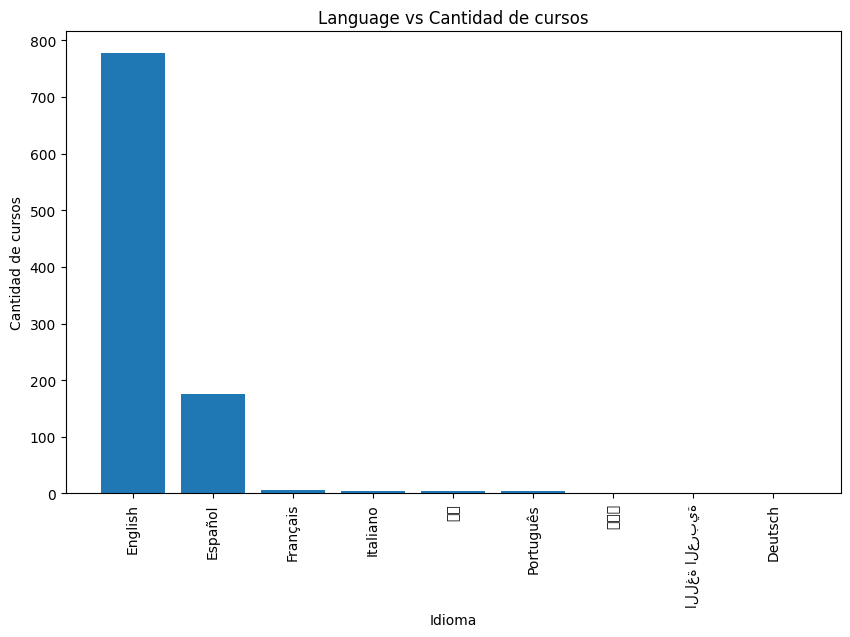

In [115]:
# Obtener los valores únicos y el recuento de cursos por idioma
cursos_por_idioma = edx_courses['language'].value_counts()

# Histograma de language vs cantidad de cursos
plt.figure(figsize=(10, 6))
plt.bar(cursos_por_idioma.index, cursos_por_idioma.values)
plt.xlabel('Idioma')
plt.ylabel('Cantidad de cursos')
plt.title('Language vs Cantidad de cursos')
plt.xticks(rotation=90)
plt.show()

C:\Users\sramr\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sramr\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sramr\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sramr\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sramr\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 259

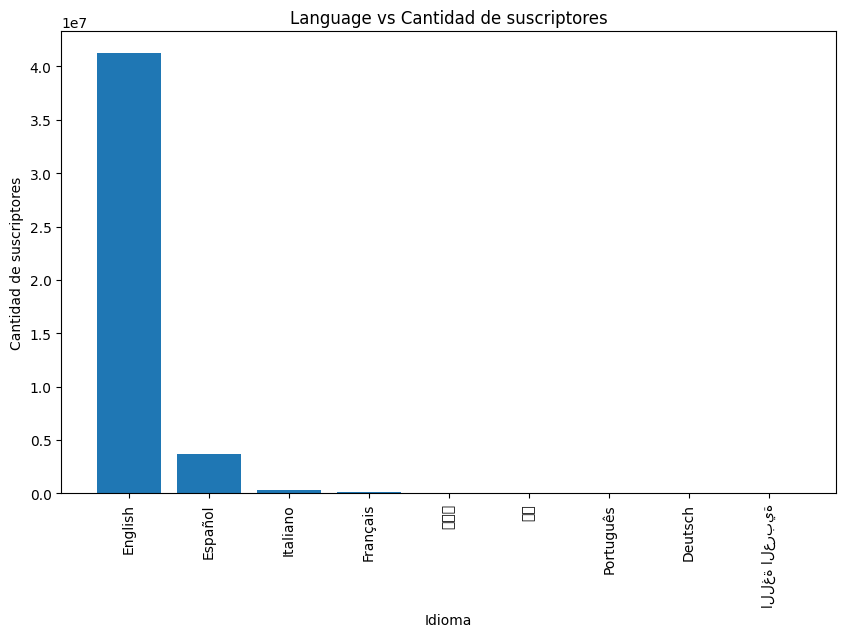

In [116]:
# Obtener la suma de suscriptores por idioma
suscriptores_por_idioma = edx_courses.groupby('language')['n_enrolled'].sum().sort_values(ascending=False)

# Histograma de language vs cantidad de suscriptores
plt.figure(figsize=(10, 6))
plt.bar(suscriptores_por_idioma.index, suscriptores_por_idioma.values)
plt.xlabel('Idioma')
plt.ylabel('Cantidad de suscriptores')
plt.title('Language vs Cantidad de suscriptores')
plt.xticks(rotation=90)
plt.show()

C:\Users\sramr\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sramr\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sramr\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


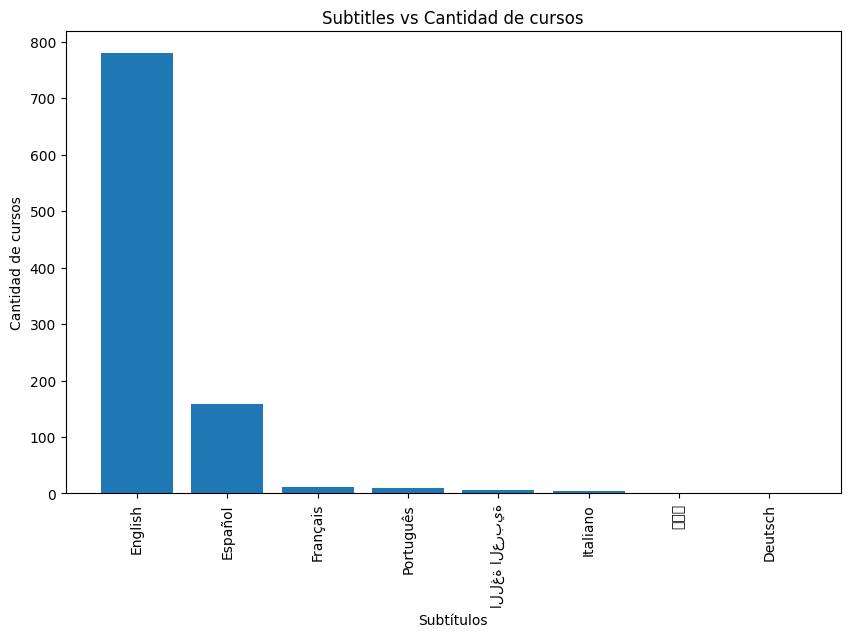

In [117]:
# Obtener los valores únicos y el recuento de cursos por subtítulos
cursos_por_subtitulos = edx_courses['subtitles'].value_counts()

# Histograma de subtitles vs cantidad de cursos
plt.figure(figsize=(10, 6))
plt.bar(cursos_por_subtitulos.index, cursos_por_subtitulos.values)
plt.xlabel('Subtítulos')
plt.ylabel('Cantidad de cursos')
plt.title('Subtitles vs Cantidad de cursos')
plt.xticks(rotation=90)
plt.show()

C:\Users\sramr\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sramr\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sramr\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


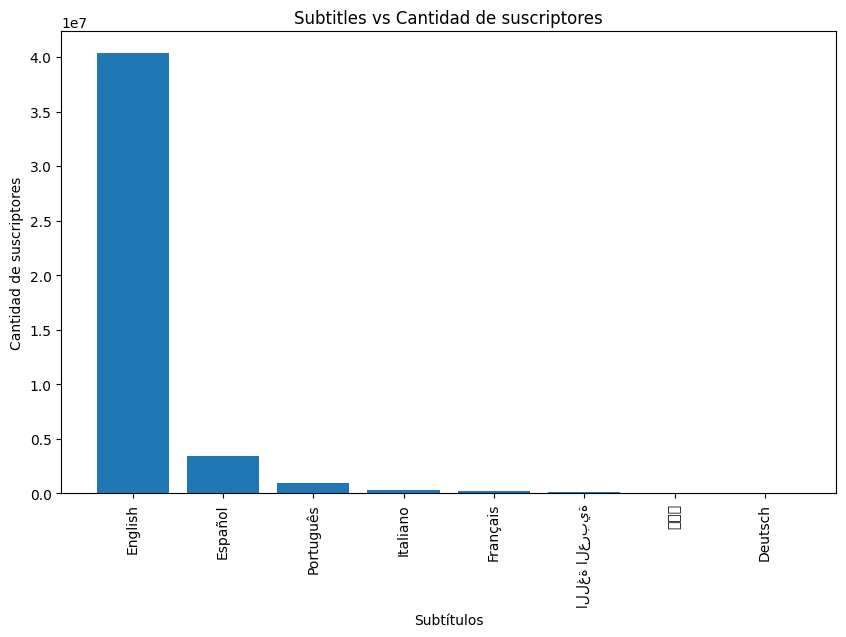

In [118]:
# Obtener la suma de suscriptores por subtítulos
suscriptores_por_subtitulos = edx_courses.groupby('subtitles')['n_enrolled'].sum().sort_values(ascending=False)

# Histograma de subtitles vs cantidad de suscriptores
plt.figure(figsize=(10, 6))
plt.bar(suscriptores_por_subtitulos.index, suscriptores_por_subtitulos.values)
plt.xlabel('Subtítulos')
plt.ylabel('Cantidad de suscriptores')
plt.title('Subtitles vs Cantidad de suscriptores')
plt.xticks(rotation=90)
plt.show()

- El habla inglesa es la mas solicitada, aunque habria que realizar un estudio de la competencia para decantarnos por la eleccion de un idioma, y ademas habria que hacer un estudio de la demanda a lo mejor hay poco contenido de calidad en cierto idioma y es una oportunidad para liderar el mercado en cierto idioma que nosotros consideremos como joya, a lo mejor podria ser el mercado hindu o el mercado sudafricano, la idea es considerar la demanda de cada pais y si aun no ha llegado competencia de calidad (por lo menos relativamente mucha) entonces es una oportunidad para monopolizar y ganar por lo menos a corto plazo.

In [119]:
edx_courses.columns

Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subject', 'language', 'subtitles',
       'course_effort', 'course_length', 'price', 'course_description',
       'course_syllabus', 'course_url'],
      dtype='object')

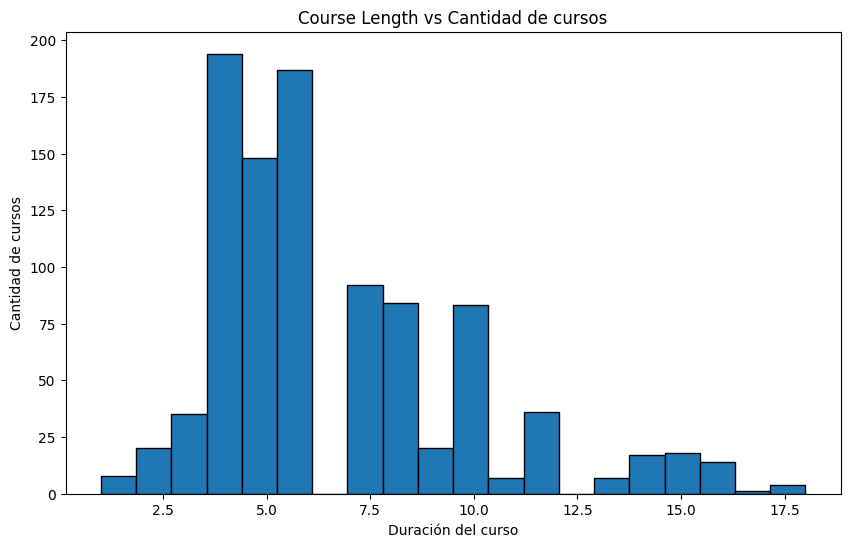

In [120]:
# Histograma de course_length vs cantidad de cursos
plt.figure(figsize=(10, 6))
plt.hist(edx_courses['course_length'], bins=20, edgecolor='black')
plt.xlabel('Duración del curso')
plt.ylabel('Cantidad de cursos')
plt.title('Course Length vs Cantidad de cursos')
plt.show()

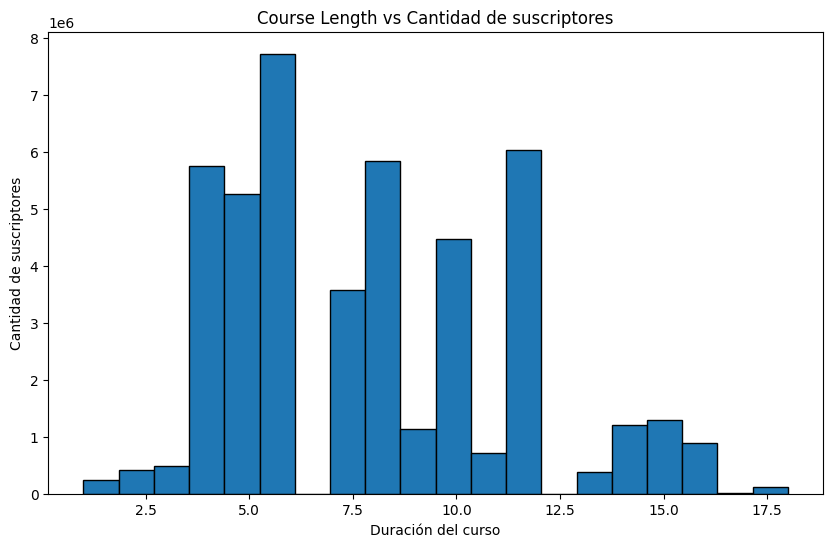

In [121]:
# Histograma de course_length vs cantidad de suscriptores
plt.figure(figsize=(10, 6))
plt.hist(edx_courses['course_length'], bins=20, edgecolor='black', weights=edx_courses['n_enrolled'])
plt.xlabel('Duración del curso')
plt.ylabel('Cantidad de suscriptores')
plt.title('Course Length vs Cantidad de suscriptores')
plt.show()

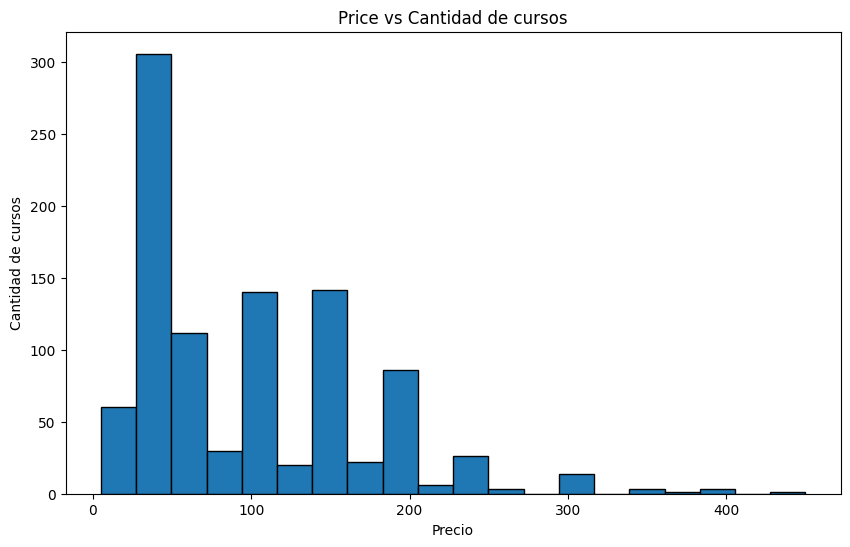

In [122]:
# Histograma de price vs cantidad de cursos
plt.figure(figsize=(10, 6))
plt.hist(edx_courses['price'], bins=20, edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Cantidad de cursos')
plt.title('Price vs Cantidad de cursos')
plt.show()

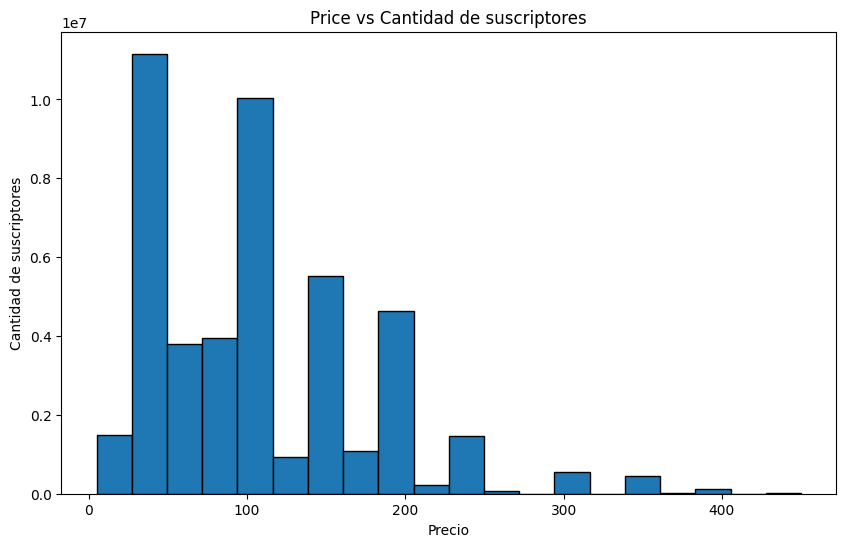

In [123]:
# Histograma de price vs cantidad de suscriptores
plt.figure(figsize=(10, 6))
plt.hist(edx_courses['price'], bins=20, edgecolor='black', weights=edx_courses['n_enrolled'])
plt.xlabel('Precio')
plt.ylabel('Cantidad de suscriptores')
plt.title('Price vs Cantidad de suscriptores')
plt.show()

# Conclusiones + KPIS

- La comunidad prefiere los cursos 'Self_paced on your time'
- La comunidad prefiere los cursos de Harvard
- La comunidad prefiere el contenido de David
- La comunidad prefiere los cursos introductorios (¿Hay mas gente en ese nivel?)
- La comunidad prefiere a los cursos de Ciencias de la computacion
- La comunidad prefiere los cursos de ingles
- La comunidad prefiere los cursos de 4-6 horas (relativamente cortos)
- La comunidad prefiere los cursos relativamente baratos (25 - 50 dolares)

In [124]:
edx_courses.dtypes

title                 object
summary               object
n_enrolled             int32
course_type           object
institution           object
instructors           object
Level                 object
subject               object
language              object
subtitles             object
course_effort         object
course_length          int32
price                  int32
course_description    object
course_syllabus       object
course_url            object
dtype: object

In [125]:
edx_courses.to_csv('Moocs/edx_courses.csv', index=False, encoding='utf-8')